<a href="https://colab.research.google.com/github/Archanamayacharya/tobacco-use-mortality-analysis/blob/main/Tobacco_use__and__mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# for admissions
import pandas as pd

# Load dataset
file_path = "/content/admissions.csv"
df = pd.read_csv(file_path)

# 1. Strip whitespace from column names and values
df.columns = df.columns.str.strip()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# 2. Split Year into Start_Year and End_Year
df[["Start_Year", "End_Year"]] = df["Year"].str.split("/", expand=True)
df["Start_Year"] = pd.to_numeric(df["Start_Year"], errors="coerce")
df["End_Year"] = pd.to_numeric(df["End_Year"], errors="coerce")

# 3. Convert Value column to numeric
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

# 4. Handle missing values (no inplace to avoid warnings)
df["Sex"] = df["Sex"].fillna("Unknown")
df["Value"] = df["Value"].fillna(df["Value"].median())

# 5. Remove duplicates
df = df.drop_duplicates()

# 6. Reset index
df = df.reset_index(drop=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save cleaned file in current Colab directory
output_path = "admissions_cleaned.csv"
df.to_csv(output_path, index=False)

# Download to your PC
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
#for fatalities
import pandas as pd

# Load dataset
file_path = "/content/fatalities.csv"
df = pd.read_csv(file_path)

# 1. Strip whitespace from column names and values
df.columns = df.columns.str.strip()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# 2. Ensure Year is numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 3. Convert Value column to numeric
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

# 4. Handle missing values
df["Sex"] = df["Sex"].fillna("Unknown")
df["Value"] = df["Value"].fillna(df["Value"].median())

# 5. Remove duplicates
df = df.drop_duplicates()

# 6. Reset index
df = df.reset_index(drop=True)

In [ ]:
# Save cleaned file in current Colab directory
output_path = "fatalities_cleaned.csv"
df.to_csv(output_path, index=False)

# Download to your PC
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
#for metrics
import pandas as pd

# Load dataset
file_path = "/content/metrics.csv"
df = pd.read_csv(file_path)

# 1. Clean column names (remove \n and extra spaces)
df.columns = df.columns.str.replace("\n", " ", regex=True).str.strip()

# 2. Ensure numeric columns are properly typed
for col in df.columns:
    if col != "Year":  # Year is already int
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 3. Handle missing values
# Fill numeric NaNs with median
df = df.fillna(df.median(numeric_only=True))

# 4. Remove duplicates (if any)
df = df.drop_duplicates()

# 5. Reset index
df = df.reset_index(drop=True)

In [ ]:
# Save cleaned file in current Colab directory
output_path = "metrics_cleaned.csv"
df.to_csv(output_path, index=False)

# Download to your PC
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#for prescriptions
import pandas as pd

# Load dataset
file_path = "/content/prescriptions.csv"
data = pd.read_csv(file_path)

# 1. Clean column names (make them snake_case)
data.columns = (
    data.columns.str.strip()
    .str.lower()
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.replace(" ", "_", regex=False)
)

# 2. Clean Year column → take first 4 digits as integer
data["year"] = data["year"].str[:4].astype(int)

# 3. Check missing values before handling
print("Missing values before cleaning:\n", data.isnull().sum())

# 4. Handle missing values → fill with 0 (or could use forward fill depending on context)
data = data.fillna(0)

# 5. Ensure numeric columns are integers where possible
for col in data.columns:
    if col != "year":
        data[col] = data[col].astype(int)

# 6. Remove duplicates if any
data = data.drop_duplicates()

# 7. Reset index
data = data.reset_index(drop=True)

# 8. Check missing values after cleaning
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values before cleaning:
 year                                                         0
all_pharmacotherapy_prescriptions                            0
nicotine_replacement_therapy_nrt_prescriptions               0
bupropion_zyban_prescriptions                                0
varenicline_champix_prescriptions                            2
net_ingredient_cost_of_all_pharmacotherapies                 0
net_ingredient_cost_of_nicotine_replacement_therapies_nrt    0
net_ingredient_cost_of_bupropion_zyban                       0
net_ingredient_cost_of_varenicline_champix                   2
dtype: int64
Missing values after cleaning:
 year                                                         0
all_pharmacotherapy_prescriptions                            0
nicotine_replacement_therapy_nrt_prescriptions               0
bupropion_zyban_prescriptions                                0
varenicline_champix_prescriptions                            0
net_ingredient_cost_of_all_pharmacothera

In [ ]:
# Save cleaned file in current Colab directory
output_path = "prescription_cleaned.csv"
df.to_csv(output_path, index=False)

# Download to your PC
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
#for smokers
import pandas as pd

# Load dataset
file_path = "/content/smokers.csv"
df = pd.read_csv(file_path)

# 🔎 Inspect dataset
print("Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:")
print(df.head())

# 🧹 Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("+", "plus")

# Example: '16 and over' → '16_and_over'
df.columns = df.columns.str.replace("-", "_").str.replace("and", "and").str.replace("__", "_")

# 🧹 Convert year column to integer (if not already)
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce')

# 🧹 Handle missing values
# For numeric columns → fill with median
# For categorical (e.g., sex, method) → fill with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 🧹 Remove duplicates
df.drop_duplicates(inplace=True)

# 🧹 Reset index
df.reset_index(drop=True, inplace=True)

Shape: (84, 9)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         84 non-null     int64 
 1   Method       84 non-null     object
 2   Sex          56 non-null     object
 3   16 and Over  84 non-null     int64 
 4   16-24        84 non-null     int64 
 5   25-34        84 non-null     int64 
 6   35-49        84 non-null     int64 
 7   50-59        84 non-null     int64 
 8   60 and Over  84 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.0+ KB
None

Missing values:
 Year            0
Method          0
Sex            28
16 and Over     0
16-24           0
25-34           0
35-49           0
50-59           0
60 and Over     0
dtype: int64

First 5 rows:
   Year      Method  Sex  16 and Over  16-24  25-34  35-49  50-59  60 and Over
0  1974  Unweighted  NaN           46     44     51     52     50           

/tmp/ipython-input-1029721621.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1029721621.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Save cleaned file in current Colab directory
output_path = "smokers_cleaned.csv"
df.to_csv(output_path, index=False)

# Download to your PC
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd

# Load your datasets (replace with your file paths)
df1 = pd.read_csv("/content/admissions_cleaned.csv")
df2 = pd.read_csv("/content/fatalities_cleaned.csv")
df3 = pd.read_csv("/content/metrics_cleaned.csv")
df4 = pd.read_csv("/content/prescription_cleaned.csv")
df5 = pd.read_csv("/content/smokers_cleaned.csv")

datasets = {"df1": df1, "df2": df2, "df3": df3, "df4": df4, "df5": df5}

# Show columns and shape for each
for name, df in datasets.items():
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print()

--- df1 ---
Shape: (2079, 9)
Columns: ['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric', 'Sex', 'Value', 'Start_Year', 'End_Year']

--- df2 ---
Shape: (1749, 7)
Columns: ['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric', 'Sex', 'Value']

--- df3 ---
Shape: (36, 9)
Columns: ['Year', 'Tobacco Price Index', 'Retail Prices Index', 'Tobacco Price Index Relative to Retail Price Index', "Real Households' Disposable Income", 'Affordability of Tobacco Index', 'Household Expenditure on Tobacco', 'Household Expenditure Total', 'Expenditure on Tobacco as a Percentage of Expenditure']

--- df4 ---
Shape: (84, 9)
Columns: ['year', 'method', 'sex', '16_and_over', '16_24', '25_34', '35_49', '50_59', '60_and_over']

--- df5 ---
Shape: (84, 9)
Columns: ['year', 'method', 'sex', '16_and_over', '16_24', '25_34', '35_49', '50_59', '60_and_over']



In [8]:
# 1. Standardize column names (important for merging)
df1.columns = df1.columns.str.lower().str.strip()
df2.columns = df2.columns.str.lower().str.strip()
df3.columns = df3.columns.str.lower().str.strip()
df4.columns = df4.columns.str.lower().str.strip()
df5.columns = df5.columns.str.lower().str.strip()

# 2. Merge df1 & df2 (they share same structure → stack vertically)
admissions_fatalities = pd.concat([df1, df2], ignore_index=True)

# 3. Merge df4 & df5 (same structure → stack vertically)
smokers = pd.concat([df4, df5], ignore_index=True)

# 4. Merge all together using "year"
merged = admissions_fatalities.merge(df3, on="year", how="left") \
                              .merge(smokers, on=["year","sex"], how="left")

print("Final merged shape:", merged.shape)
print(merged.head())

Final merged shape: (6160, 24)
      year                                         icd10 code  \
0  2014/15                                          All codes   
1  2014/15  C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...   
2  2014/15                                            C00-D48   
3  2014/15                                            J00-J99   
4  2014/15                                            I00-I99   

                               icd10 diagnosis  \
0                               All admissions   
1  All diseases which can be caused by smoking   
2                                  All cancers   
3                     All respiratory diseases   
4                     All circulatory diseases   

                                diagnosis type                metric      sex  \
0                               All admissions  Number of admissions  Unknown   
1  All diseases which can be caused by smoking  Number of admissions  Unknown   
2                                 

In [9]:
import pandas as pd
import numpy as np

# --- 1. Standardize year columns safely ---
# Replace NaN temporarily with 0 to avoid conversion errors
merged['start_year'] = merged['start_year'].fillna(0)
merged['end_year'] = merged['end_year'].fillna(0)

# Convert years safely
def fix_year(x):
    if x == 0:
        return np.nan  # Keep as NaN
    elif x < 100:
        return int(x) + 2000
    else:
        return int(x)

merged['start_year'] = merged['start_year'].apply(fix_year)
merged['end_year'] = merged['end_year'].apply(fix_year)

# Create a single numeric year column for analysis (use start_year or end_year)
merged['year_numeric'] = merged['start_year']

# --- 2. Handle missing numeric values ---
num_cols = ['tobacco price index',
            'household expenditure on tobacco',
            'household expenditure total',
            'expenditure on tobacco as a percentage of expenditure',
            '16_and_over','16_24','25_34','35_49','50_59','60_and_over',
            'value']

merged[num_cols] = merged[num_cols].fillna(0)

# --- 3. Remove duplicates ---
key_cols = ['year_numeric','icd10 code','sex','metric']
merged = merged.drop_duplicates(subset=key_cols)

# --- 4. Convert categorical columns ---
cat_cols = ['icd10 code', 'icd10 diagnosis', 'diagnosis type', 'metric', 'sex', 'method']
for col in cat_cols:
    merged[col] = merged[col].astype('category')

# --- 5. Select relevant columns for analysis ---
analysis_cols = ['year_numeric','icd10 code','icd10 diagnosis','diagnosis type',
                 'metric','sex','value',
                 'tobacco price index','household expenditure on tobacco',
                 'expenditure on tobacco as a percentage of expenditure',
                 '16_and_over','16_24','25_34','35_49','50_59','60_and_over']

df_analysis = merged[analysis_cols]

# --- 6. Optional: reshape smoking prevalence into long format ---
df_smoking_long = df_analysis.melt(
    id_vars=['year_numeric','sex','metric','icd10 code','icd10 diagnosis','diagnosis type','value',
             'tobacco price index','household expenditure on tobacco',
             'expenditure on tobacco as a percentage of expenditure'],
    value_vars=['16_and_over','16_24','25_34','35_49','50_59','60_and_over'],
    var_name='age_group',
    value_name='smoking_prevalence'
)

In [10]:
# --- 7. Save cleaned datasets ---
df_analysis.to_csv('merged_cleaned_analysis.csv', index=False)
df_smoking_long.to_csv('merged_cleaned_long.csv', index=False)

print("✅ Merged dataset cleaned and ready for feature engineering, visualization, or analysis!")

✅ Merged dataset cleaned and ready for feature engineering, visualization, or analysis!


In [11]:
# --- 8. Verify final datasets ---
print("✅ Final Analysis Dataset Columns:")
print(df_analysis.columns)

print("\n✅ Smoking Prevalence (Long Format) Columns:")
print(df_smoking_long.columns)

✅ Final Analysis Dataset Columns:
Index(['year_numeric', 'icd10 code', 'icd10 diagnosis', 'diagnosis type',
       'metric', 'sex', 'value', 'tobacco price index',
       'household expenditure on tobacco',
       'expenditure on tobacco as a percentage of expenditure', '16_and_over',
       '16_24', '25_34', '35_49', '50_59', '60_and_over'],
      dtype='object')

✅ Smoking Prevalence (Long Format) Columns:
Index(['year_numeric', 'sex', 'metric', 'icd10 code', 'icd10 diagnosis',
       'diagnosis type', 'value', 'tobacco price index',
       'household expenditure on tobacco',
       'expenditure on tobacco as a percentage of expenditure', 'age_group',
       'smoking_prevalence'],
      dtype='object')


In [12]:
import pandas as pd
import numpy as np

# Use your cleaned wide-format dataset
df = df_analysis.copy()

# -------------------------------
# 1️⃣ Melt wide age columns into long format
age_cols = ['16_and_over','16_24','25_34','35_49','50_59','60_and_over']
existing_age_cols = [col for col in age_cols if col in df.columns]  # keep only existing columns

df_long = df.melt(
    id_vars=['year_numeric','sex','metric','icd10 code','icd10 diagnosis','diagnosis type','value',
             'tobacco price index','household expenditure on tobacco',
             'expenditure on tobacco as a percentage of expenditure'],
    value_vars=existing_age_cols,
    var_name='age_group',
    value_name='smoking_prevalence'
)

# -------------------------------
# 2️⃣ Ensure 'household expenditure total' exists
if 'household expenditure total' not in df_long.columns:
    df_long['household expenditure total'] = 1  # avoid division errors; replace with real values if available

# Fill NaN values in numeric columns
num_cols = ['tobacco price index','household expenditure on tobacco','household expenditure total',
            'expenditure on tobacco as a percentage of expenditure','value','smoking_prevalence']
for col in num_cols:
    if col in df_long.columns:
        df_long[col] = df_long[col].fillna(0)

# -------------------------------
# 3️⃣ Duration of tobacco use per ICD code & age group
df_long['duration_of_tobacco_use'] = df_long.groupby(['icd10 code','age_group'])['year_numeric'] \
                                          .transform(lambda x: x - x.min())

# -------------------------------
# 4️⃣ Tobacco use intensity & type
df_long['tobacco_use_intensity'] = df_long['household expenditure on tobacco'] / \
                                  (df_long['household expenditure total'] + 1e-6)

if 'method' in df_long.columns:
    df_long['tobacco_type'] = df_long['method'].cat.codes
else:
    df_long['tobacco_type'] = 0  # default if method not available

# -------------------------------
# 5️⃣ Demographics
age_order = ['16_24','25_34','35_49','50_59','60_and_over','16_and_over']
df_long['age_group_code'] = df_long['age_group'].apply(lambda x: age_order.index(x) if x in age_order else np.nan)
df_long['sex_code'] = df_long['sex'].cat.codes

# -------------------------------
# 6️⃣ Socioeconomic features
df_long['tobacco_exp_pct'] = df_long['expenditure on tobacco as a percentage of expenditure']
df_long['tobacco_exp_norm'] = df_long['household expenditure on tobacco'] / \
                              (df_long['household expenditure total'] + 1e-6)

# -------------------------------
# 7️⃣ Health-related factors
df_long['is_cancer'] = df_long['icd10 diagnosis'].str.contains('cancer', case=False).astype(int)
df_long['is_respiratory'] = df_long['icd10 diagnosis'].str.contains('respiratory', case=False).astype(int)
df_long['is_circulatory'] = df_long['icd10 diagnosis'].str.contains('circulatory', case=False).astype(int)
df_long['admissions_normalized'] = df_long['value'] / df_long.groupby('year_numeric')['value'].transform('max')

# -------------------------------
# 8️⃣ Interaction features
df_long['smoking_age_interaction'] = df_long['smoking_prevalence'] * df_long['age_group_code']
df_long['tobacco_admission_interaction'] = df_long['tobacco_exp_norm'] * df_long['admissions_normalized']

# -------------------------------
# 9️⃣ Lag / temporal features
df_long['prev_year_prevalence'] = df_long.groupby(['icd10 code','age_group','sex'])['smoking_prevalence'].shift(1)
df_long['prev_year_tobacco_price'] = df_long.groupby(['icd10 code','age_group','sex'])['tobacco price index'].shift(1)

# -------------------------------
# 10️⃣ Optional log transformations
df_long['log_tobacco_exp'] = np.log1p(df_long['tobacco_exp_norm'])
df_long['log_admissions'] = np.log1p(df_long['value'])

# -------------------------------
# Final feature-engineered dataset
feature_cols = ['year_numeric','age_group','age_group_code','sex','sex_code','duration_of_tobacco_use',
                'smoking_prevalence','prev_year_prevalence','tobacco_exp_norm','log_tobacco_exp',
                'tobacco_exp_pct','tobacco_use_intensity','tobacco_type','tobacco_admission_interaction',
                'smoking_age_interaction','is_cancer','is_respiratory','is_circulatory',
                'admissions_normalized','log_admissions']

df_final = df_long[feature_cols]

/tmp/ipython-input-221394517.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_long['duration_of_tobacco_use'] = df_long.groupby(['icd10 code','age_group'])['year_numeric'] \
/tmp/ipython-input-221394517.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_long['prev_year_prevalence'] = df_long.groupby(['icd10 code','age_group','sex'])['smoking_prevalence'].shift(1)
/tmp/ipython-input-221394517.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

In [ ]:
# Save to CSV
df_final.to_csv('feature_engineered_long_safe.csv', index=False)

print("✅ Feature engineering completed successfully! Dataset is ready for modeling or visualization.")

✅ Feature engineering completed successfully! Dataset is ready for modeling or visualization.


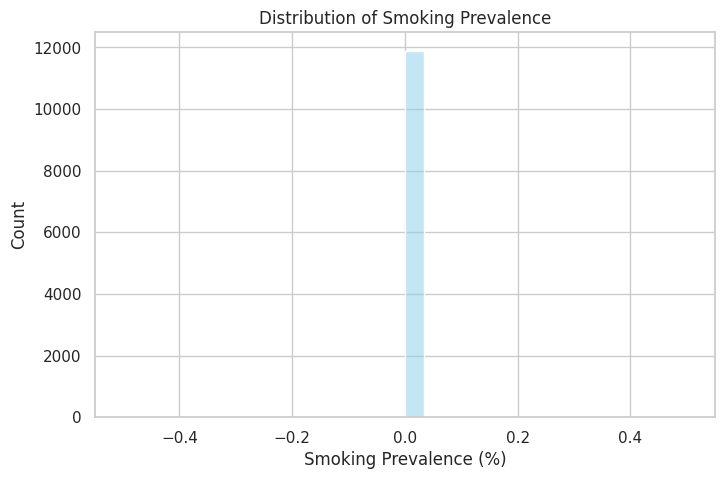

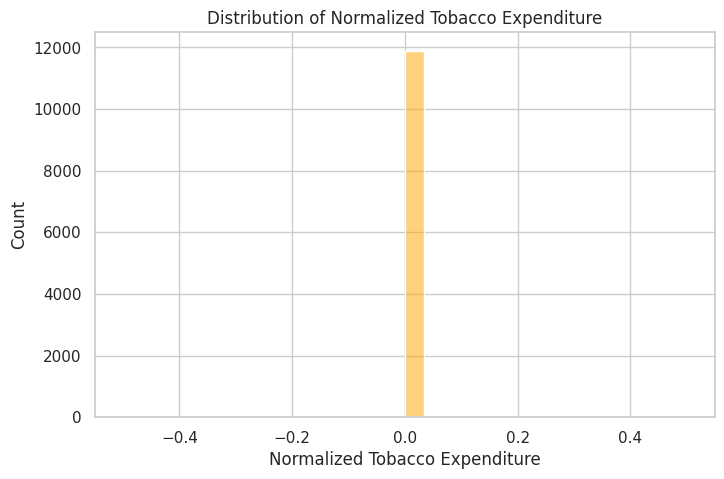

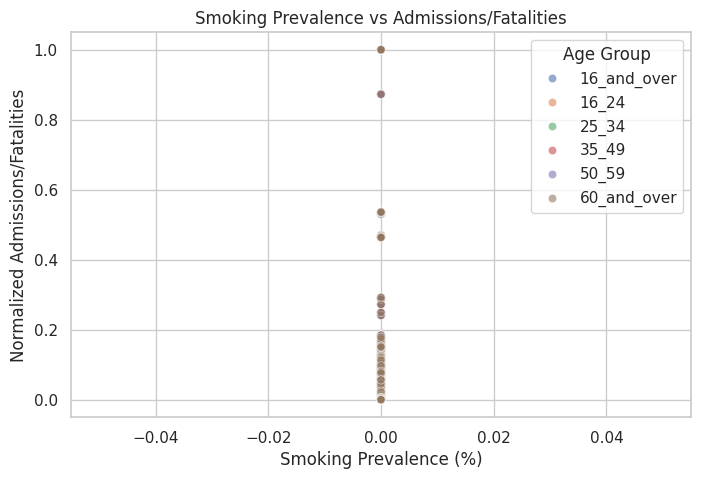

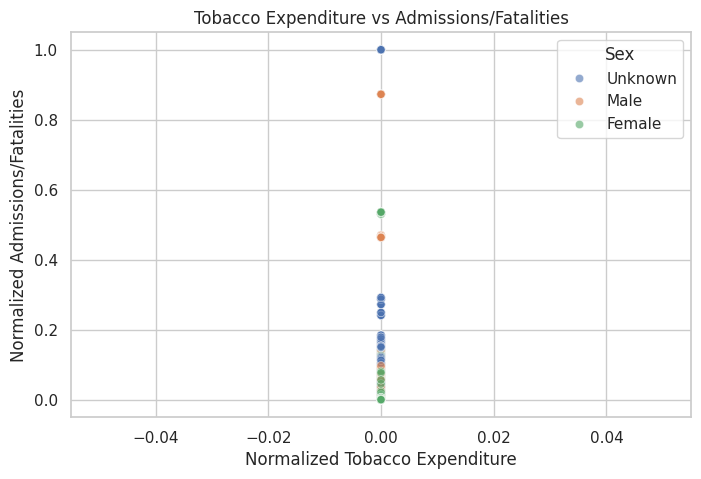

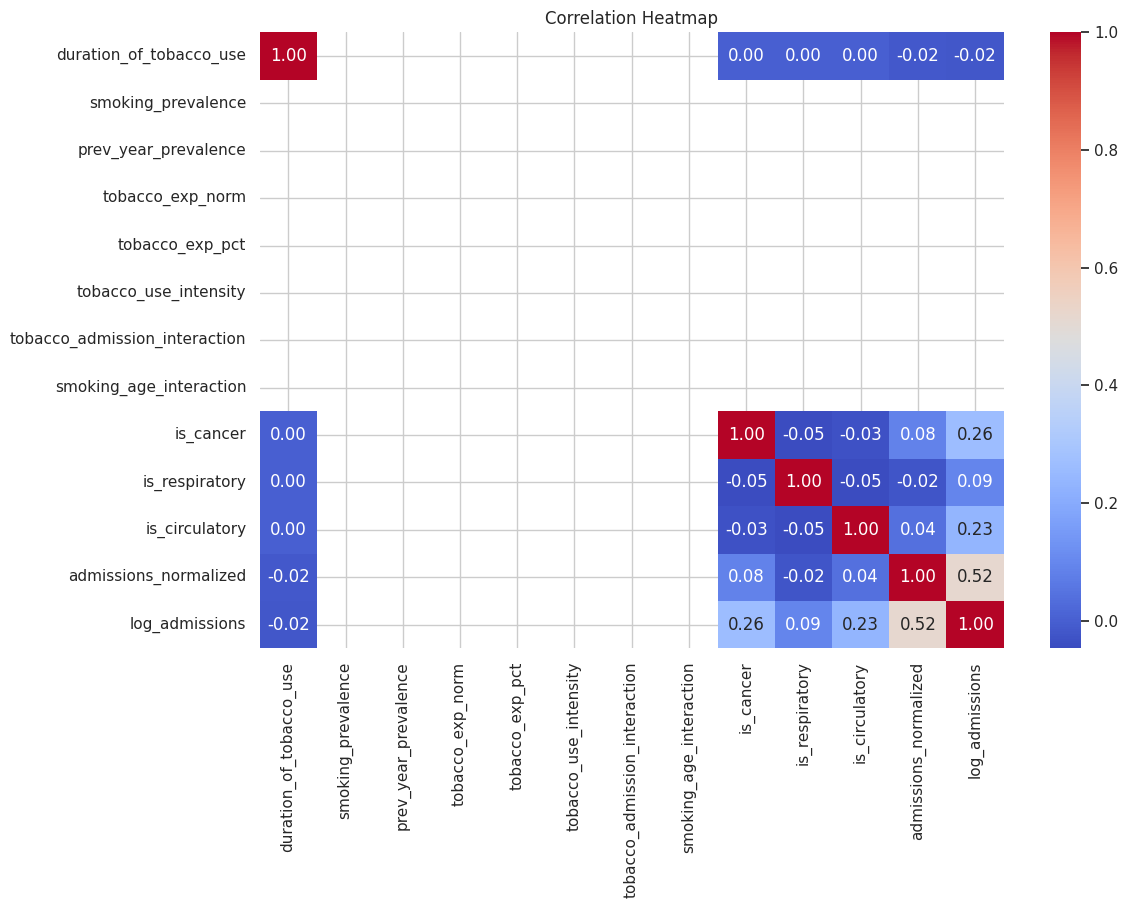

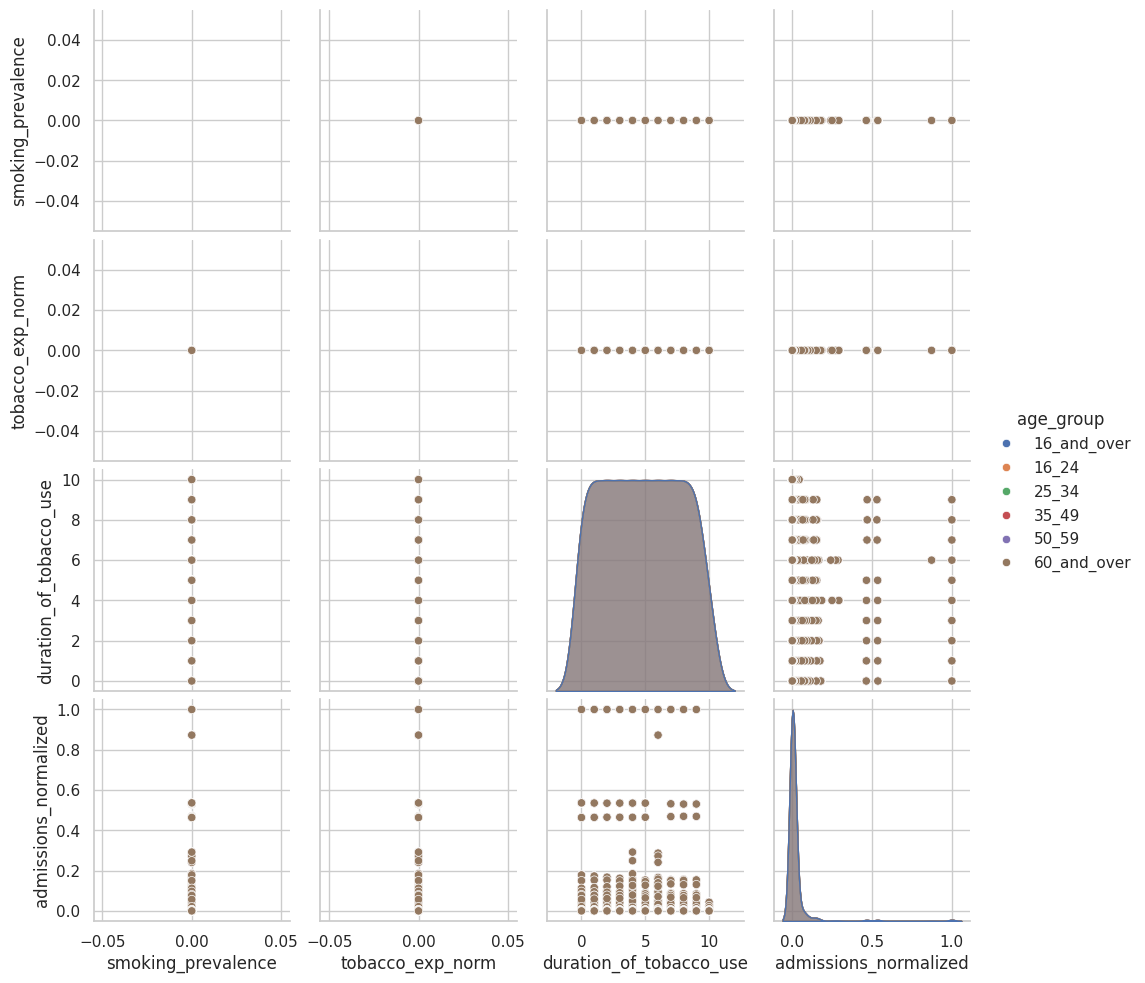

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the feature-engineered dataset
df = pd.read_csv('/content/feature_engineered_long_safe.csv')

# Set seaborn style
sns.set(style="whitegrid")

# -------------------------------
# 1️⃣ Ensure numeric columns are correct
numeric_cols = ['duration_of_tobacco_use','smoking_prevalence','prev_year_prevalence',
                'tobacco_exp_norm','tobacco_exp_pct','tobacco_use_intensity',
                'tobacco_admission_interaction','smoking_age_interaction',
                'is_cancer','is_respiratory','is_circulatory',
                'admissions_normalized','log_admissions']

target = 'admissions_normalized'

# Convert all numeric columns to float
for col in numeric_cols + [target]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in numeric columns for clean EDA
df_clean = df.dropna(subset=numeric_cols + [target])

# -------------------------------
# 2️⃣ Histograms
plt.figure(figsize=(8,5))
sns.histplot(df_clean['smoking_prevalence'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Smoking Prevalence')
plt.xlabel('Smoking Prevalence (%)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_clean['tobacco_exp_norm'], bins=30, kde=True, color='orange')
plt.title('Distribution of Normalized Tobacco Expenditure')
plt.xlabel('Normalized Tobacco Expenditure')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 3️⃣ Scatter plots

# Smoking prevalence vs normalized admissions
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='smoking_prevalence', y='admissions_normalized',
                hue='age_group', alpha=0.6)
plt.title('Smoking Prevalence vs Admissions/Fatalities')
plt.xlabel('Smoking Prevalence (%)')
plt.ylabel('Normalized Admissions/Fatalities')
plt.legend(title='Age Group')
plt.show()

# Tobacco expenditure vs normalized admissions
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='tobacco_exp_norm', y='admissions_normalized',
                hue='sex', alpha=0.6)
plt.title('Tobacco Expenditure vs Admissions/Fatalities')
plt.xlabel('Normalized Tobacco Expenditure')
plt.ylabel('Normalized Admissions/Fatalities')
plt.legend(title='Sex')
plt.show()

# -------------------------------
# 4️⃣ Correlation heatmap
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# -------------------------------
# 5️⃣ Pairplot for key features
selected_features = ['smoking_prevalence','tobacco_exp_norm','duration_of_tobacco_use','admissions_normalized']
sns.pairplot(df_clean[selected_features + ['age_group']], hue='age_group', diag_kind='kde')
plt.show()

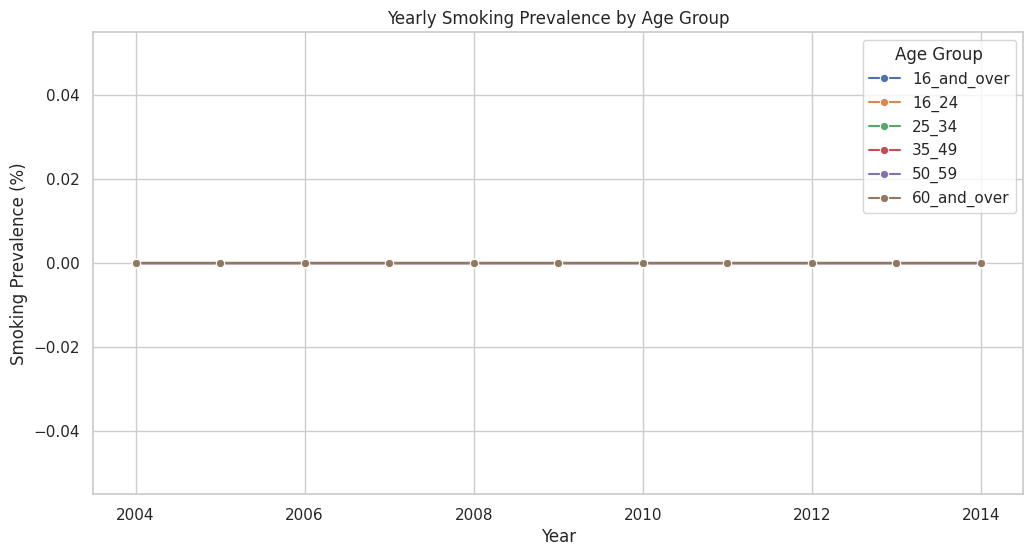

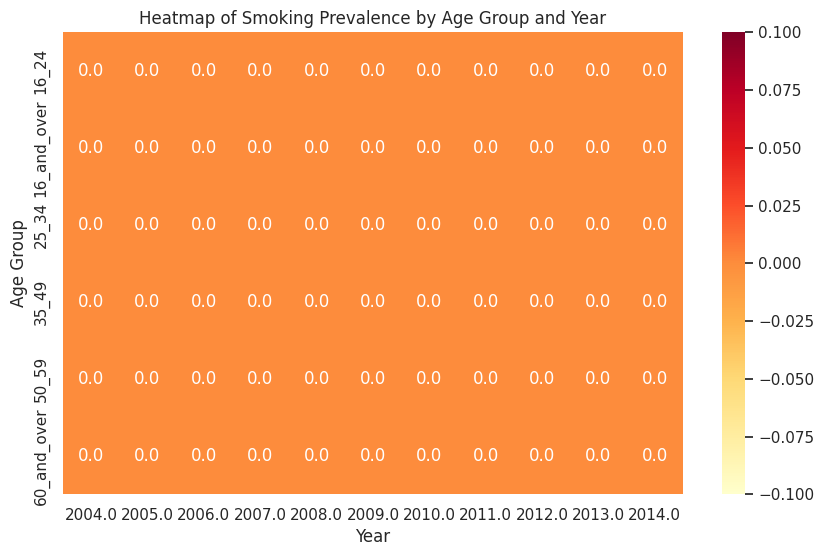

In [ ]:
# 9️⃣ Advanced visualizations

# a) Yearly smoking prevalence trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df_clean, x='year_numeric', y='smoking_prevalence', hue='age_group', marker='o')
plt.title('Yearly Smoking Prevalence by Age Group')
plt.xlabel('Year')
plt.ylabel('Smoking Prevalence (%)')
plt.legend(title='Age Group')
plt.show()

# c) Age-wise heatmap of smoking prevalence
age_year_pivot = df_clean.pivot_table(index='age_group', columns='year_numeric',
                                      values='smoking_prevalence', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(age_year_pivot, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Heatmap of Smoking Prevalence by Age Group and Year')
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.show()

In [ ]:
print(df_clean.columns.tolist())

['year_numeric', 'age_group', 'age_group_code', 'sex', 'sex_code', 'duration_of_tobacco_use', 'smoking_prevalence', 'prev_year_prevalence', 'tobacco_exp_norm', 'log_tobacco_exp', 'tobacco_exp_pct', 'tobacco_use_intensity', 'tobacco_type', 'tobacco_admission_interaction', 'smoking_age_interaction', 'is_cancer', 'is_respiratory', 'is_circulatory', 'admissions_normalized', 'log_admissions']


In [ ]:
from google.colab import files

# Save the DataFrame as CSV first
df_clean.to_csv('tobacco_mortality_cleaned.csv', index=False)

# Download the file to your PC
files.download('tobacco_mortality_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===========================
# Mortality Prediction Pipeline
# ===========================

import pandas as pd
import numpy as np

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Preprocessing & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# -----------------------------
# 1. Load Data
# -----------------------------
df = pd.read_csv("/content/tobacco_mortality_cleaned.csv")

# -----------------------------
# 2. Define Target Variable
# Combine cancer, respiratory, circulatory into "tobacco_related_mortality"
# -----------------------------
df["tobacco_related_mortality"] = (
    (df["is_cancer"] | df["is_respiratory"] | df["is_circulatory"]).astype(int)
)

y = df["tobacco_related_mortality"]

# -----------------------------
# 3. Define Features
# Drop non-useful or target columns
# -----------------------------
X = df.drop(
    ["is_cancer", "is_respiratory", "is_circulatory", "tobacco_related_mortality"],
    axis=1
)

# Encode categorical features
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 5. Define Models
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# -----------------------------
# 6. Train & Evaluate
# -----------------------------
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print("="*50)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    if roc_auc:
        print(f"ROC-AUC: {roc_auc:.4f}")

    results[name] = roc_auc

# -----------------------------
# 7. Compare Results
# -----------------------------
print("\nROC-AUC Scores Summary:")
for model, score in results.items():
    print(f"{model}: {score:.4f}" if score else f"{model}: N/A (no probas)")


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2078
           1       0.45      0.10      0.17       302

    accuracy                           0.87      2380
   macro avg       0.67      0.54      0.55      2380
weighted avg       0.83      0.87      0.83      2380

ROC-AUC: 0.8035
Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2078
           1       0.99      0.99      0.99       302

    accuracy                           1.00      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       1.00      1.00      1.00      2380

ROC-AUC: 0.9941
Model: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2078
           1       0.80      0.60      0.69       302

    accuracy                           0.93      2380
   macro avg       0.87    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:10:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2078
           1       0.92      0.89      0.91       302

    accuracy                           0.98      2380
   macro avg       0.95      0.94      0.95      2380
weighted avg       0.98      0.98      0.98      2380

ROC-AUC: 0.9971
[LightGBM] [Info] Number of positive: 1210, number of negative: 8308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 9518, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127128 -> initscore=-1.926599
[LightGBM] [Info] Start training from score -1.926599


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model: LightGBM
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2078
           1       0.95      0.83      0.89       302

    accuracy                           0.97      2380
   macro avg       0.96      0.91      0.94      2380
weighted avg       0.97      0.97      0.97      2380

ROC-AUC: 0.9967
Model: SVM
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2078
           1       0.00      0.00      0.00       302

    accuracy                           0.87      2380
   macro avg       0.44      0.50      0.47      2380
weighted avg       0.76      0.87      0.81      2380

ROC-AUC: 0.6243


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Neural Network
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2078
           1       0.64      0.38      0.48       302

    accuracy                           0.89      2380
   macro avg       0.78      0.67      0.71      2380
weighted avg       0.88      0.89      0.88      2380

ROC-AUC: 0.9085

ROC-AUC Scores Summary:
Logistic Regression: 0.8035
Decision Tree: 0.9941
Random Forest: 0.9718
Gradient Boosting: 0.9501
XGBoost: 0.9971
LightGBM: 0.9967
SVM: 0.6243
Neural Network: 0.9085


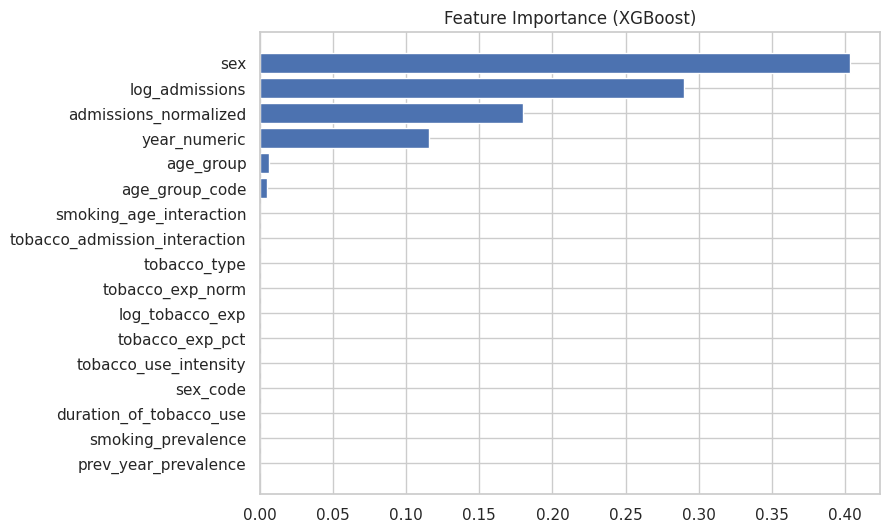

ValueError: could not convert string to float: '[1.2712754E-1]'

In [ ]:
import matplotlib.pyplot as plt
import shap

# Train your best model again (if not already done)
best_model = XGBClassifier(eval_metric="logloss", random_state=42)
best_model.fit(X_train, y_train)

# --- Feature Importance ---
importances = best_model.feature_importances_
feat_names = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(range(len(importances)), importances[sorted_idx], align="center")
plt.yticks(range(len(importances)), [feat_names[i] for i in sorted_idx])
plt.title("Feature Importance (XGBoost)")
plt.show()

# --- SHAP Explanations ---
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test, feature_names=feat_names)

# Force plot for one prediction (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=feat_names)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)   # use your train data

import pickle
with open("xgb_model.pkl","wb") as f:
    pickle.dump(xgb, f)

In [ ]:
from xgboost import XGBClassifier
import pickle

# Train model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Save model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

print("✅ Saved xgb_model.pkl successfully")

✅ Saved xgb_model.pkl successfully


In [ ]:
from google.colab import files
files.download("xgb_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import pandas as pd

# ----------------------------
# Page Setup
# ----------------------------
st.set_page_config(page_title="🚭 Tobacco Mortality Prediction", layout="wide")
st.title("🚭 Tobacco Use & Mortality Risk Prediction Dashboard")

# ----------------------------
# Load Model
# ----------------------------
@st.cache_resource
def load_model():
    with open("xgb_model.pkl", "rb") as f:
        model = pickle.load(f)
    return model

model = load_model()

# ----------------------------
# Input Sidebar
# ----------------------------
st.sidebar.header("🧾 Input Patient Details")

sex = st.sidebar.selectbox("Sex", ["Male", "Female"])
sex_encoded = 1 if sex == "Male" else 0

age_group_mapping = {
    "0–14": 0,
    "15–29": 1,
    "30–44": 2,
    "45–59": 3,
    "60+": 4
}
age_group = st.sidebar.selectbox("Age Group", list(age_group_mapping.keys()))
age_code = age_group_mapping[age_group]

log_admissions = st.sidebar.number_input("Log Admissions", value=0.0, format="%.2f")
admissions_normalized = st.sidebar.number_input("Admissions Normalized", value=0.0, format="%.2f")
year_numeric = st.sidebar.number_input("Year", value=2020)

if st.sidebar.button("Predict Risk 🧠"):
    features = np.array([sex_encoded, log_admissions, admissions_normalized, year_numeric, age_code]).reshape(1, -1)
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0, 1] * 100

    with st.container():
        st.subheader("📊 Prediction Result")

        if prediction == 1:
            st.error(f"⚠️ High Mortality Risk — {probability:.2f}%")
        else:
            st.success(f"✅ Low Mortality Risk — {probability:.2f}%")

        st.write("### 🩺 Clinical Insights")
        if prediction == 1:
            st.write("""
            - 🚨 High Risk Detected
            - Recommend medical monitoring
            - Support tobacco cessation programs
            - Consider screening for tobacco-related diseases
            """)
        else:
            st.write("""
            - 🟢 Low Risk
            - Maintain healthy lifestyle
            - Continue routine health check-ups
            """)

# ----------------------------
# Footer
# ----------------------------
st.write("---")
st.caption("Developed by Archana — Tobacco Mortality ML Project 🚭")

Writing app.py


In [ ]:
from google.colab import files

files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2nd part

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import pandas as pd

# ----------------------------
# Page Setup
# ----------------------------
st.set_page_config(page_title="🚭 Tobacco Mortality Prediction", layout="wide")
st.title("🚭 Tobacco Use & Mortality Risk Prediction Dashboard")

# ----------------------------
# Load Model
# ----------------------------
@st.cache_resource
def load_model():
    with open("xgb_model.pkl", "rb") as f:
        model = pickle.load(f)
    return model

model = load_model()

# ----------------------------
# Input Sidebar
# ----------------------------
st.sidebar.header("🧾 Input Patient Details")

sex = st.sidebar.selectbox("Sex", ["Male", "Female"])
sex_encoded = 1 if sex == "Male" else 0

age_group_mapping = {
    "0–14": 0,
    "15–29": 1,
    "30–44": 2,
    "45–59": 3,
    "60+": 4
}
age_group = st.sidebar.selectbox("Age Group", list(age_group_mapping.keys()))
age_code = age_group_mapping[age_group]

log_admissions = st.sidebar.number_input("Log Admissions", value=0.0, format="%.2f")
admissions_normalized = st.sidebar.number_input("Admissions Normalized", value=0.0, format="%.2f")
year_numeric = st.sidebar.number_input("Year", value=2020)

if st.sidebar.button("Predict Risk 🧠"):

    input_df = pd.DataFrame([{
        "sex": sex_encoded,
        "log_admissions": log_admissions,
        "admissions_normalized": admissions_normalized,
        "year_numeric": year_numeric,
        "age_code": age_code
    }])

    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0, 1] * 100

    with st.container():
        st.subheader("📊 Prediction Result")

        if prediction == 1:
            st.error(f"⚠️ High Mortality Risk — {probability:.2f}%")
        else:
            st.success(f"✅ Low Mortality Risk — {probability:.2f}%")

        st.write("### 🩺 Clinical Insights")
        if prediction == 1:
            st.write("""
            - 🚨 High Risk Detected
            - Recommend medical monitoring
            - Support tobacco cessation programs
            - Consider screening for tobacco-related diseases
            """)
        else:
            st.write("""
            - 🟢 Low Risk
            - Maintain healthy lifestyle
            - Continue routine health check-ups
            """)

st.write("---")
st.caption("Developed by Archana — Tobacco Mortality ML Project 🚭")

Writing app.py


In [ ]:
from google.colab import files

files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip show xgboost

Name: xgboost
Version: 3.1.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 


In [ ]:
from xgboost import XGBClassifier
import pickle

# Train model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Save model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

print("✅ Model saved as xgb_model.pkl")

NameError: name 'X_train' is not defined